## Final Project Submission

Please fill out:
* Student name: Eyamba Ita
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pylab as pl
import numpy as np

In [2]:
df=pd.read_csv('airbnb_austin.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1078,https://www.airbnb.com/rooms/1078,20190411154311,2019-04-11,*UT/Hyde Park Craftsman Apartment,This upstairs apartment is surrounded by trees...,The garage apartment was built in the 1920s an...,This upstairs apartment is surrounded by trees...,none,"Hyde Park is close to downtown, UT, 6th street...",...,t,f,flexible,f,f,2,2,0,0,1.66
1,2265,https://www.airbnb.com/rooms/2265,20190411154311,2019-04-11,Zen-East in the Heart of Austin,Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.20


In [3]:
df.shape

(11889, 106)

In [4]:
#list(df.columns.values)


In [5]:
#Tuner for undertanding variables
df['cleaning_fee'].head(12)

0      $35.00
1     $100.00
2      $75.00
3         NaN
4         NaN
5      $50.00
6       $0.00
7      $85.00
8       $0.00
9      $50.00
10     $80.00
11        NaN
Name: cleaning_fee, dtype: object

In [6]:
df_new =df.loc[:, df.columns.str.startswith(('host','review'))]
#df_new.head(2)
list(df_new.columns.values)

['host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,host_has_profile_pic,host_identity_verified,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,1.188900e+04,11889,11886,11886,11856,7844,8371,8371,0.0,11886,...,11886,11886,9168.000000,9164.000000,9164.000000,9161.000000,9163.000000,9155.000000,9156.000000,9290.000000
unique,NaN,8403,3032,2719,424,5041,4,51,NaN,2,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/users/show/118565935,Stay Alfred,2017-02-28,"Austin, Texas, United States","From all of us at TurnKey Vacation Rentals, we...",within an hour,100%,NaN,f,...,t,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,82,144,89,9196,96,6533,6878,NaN,8205,...,11873,6094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.871676e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96.316427,9.785356,9.638149,9.867918,9.870021,9.736210,9.608890,1.663201
std,6.638690e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.843105,0.671101,0.814719,0.564234,0.566876,0.646831,0.775121,1.922896
min,2.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,7.138951e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.260000
50%,2.872573e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.970000
75%,9.705761e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.420000


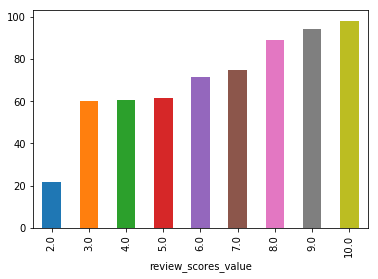

<Figure size 432x288 with 0 Axes>

In [7]:
#df_new.groupby('review_scores_value')['host_total_listings_count'].mean().plot(kind='bar')
df_new.groupby('review_scores_value')['review_scores_rating'].mean().plot(kind='bar')
fig=plt.figure()
df_new.describe(include='all')
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter3D('host_response_rate','review_scores_value','review_scores_rating', marker ='o')

In [8]:
#Classification Task to show if host reponse time can be used to predict ratings and score values
to_drop =['host_id','host_url','host_name','host_since','host_location','host_about','host_response_time','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','reviews_per_month']
#Host_response_rate is an object and needs to be converted to a float
#df_new['host_response_rate'] = df_new.host_response_rate.astype(float)
df_new1=df_new[['review_scores_value','review_scores_rating', 'host_response_time']]
df_new1.head(3)

,review_scores_value,review_scores_rating,host_response_time
0,10.0,98.0,within an hour
1,9.0,93.0,within a few hours
2,9.0,91.0,within a few hours


In [9]:
#Detecting all NaN values
df_new1.isnull().sum()

review_scores_value     2733
review_scores_rating    2721
host_response_time      3518
dtype: int64

In [10]:
#Deleting any row that has a NaN
df_new2=df_new1.dropna()
df_new2.head(2)

,review_scores_value,review_scores_rating,host_response_time
0,10.0,98.0,within an hour
1,9.0,93.0,within a few hours


In [11]:
#Verifying no NaN values
df_new2.isnull().sum()

review_scores_value     0
review_scores_rating    0
host_response_time      0
dtype: int64

In [12]:
#Determine the unique time classifications and their size in the data set.
#print(df_new1['host_response_time'].unique())
print(df_new2.groupby('host_response_time').size())


host_response_time
a few days or more      72
within a day           555
within a few hours     844
within an hour        5832
dtype: int64


In [13]:
#Need to encode the host reponse time to some categories that can be evaluated - get dummies
df_new2['host_response_time'].describe()
from sklearn.preprocessing import LabelEncoder

df_new3 =df_new2.copy()
lb_make = LabelEncoder()
df_new3['host_response_time_code']=lb_make.fit_transform(df_new2['host_response_time'])
df_new3.head(3)

#df_new3= df_new2['host_response_time'].astype('category')
#df_new3['host_response_time'] = df_new3['host_response_time'].cat.codes
#df_new3.head(3)

,review_scores_value,review_scores_rating,host_response_time,host_response_time_code
0,10.0,98.0,within an hour,3
1,9.0,93.0,within a few hours,2
2,9.0,91.0,within a few hours,2


In [14]:
#Need to encode the host reponse time to some categories that can be evaluated
df_new4=df_new3.drop(['host_response_time'], axis=1)
df_new4.head(3)

,review_scores_value,review_scores_rating,host_response_time_code
0,10.0,98.0,3
1,9.0,93.0,2
2,9.0,91.0,2


In [15]:
#print((df_new.groupby('host_name').size()))
#print(df_new.groupby('host_name').size())

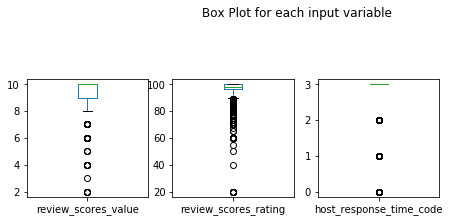

In [16]:
df_new4.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10), 
title='Box Plot for each input variable')
pl.savefig('airbnb')
pl.show()

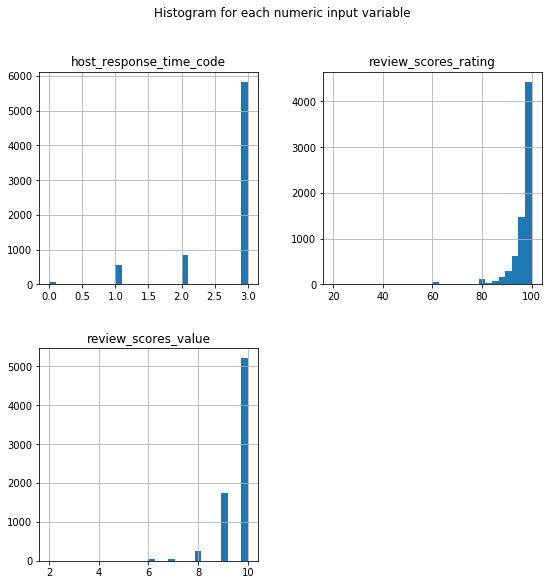

In [17]:
#df_new.drop('host_name' ,axis=1).hist(bins=30, figsize=(9,9))
df_new4.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
pl.savefig('data_hist')
pl.show()

In [18]:
#3-dimensional chart



In [19]:
#Classification question 1
#df_1= df_new[['host_id','review_scores_value', 'review_scores_rating']]
#df_1.head(2)
#x=df['review_scores_value']
#df_1.isnull().values.any()
#nan_rows = df_1[df_1['host_response_rate'].isnull()]
#nan_rows
#df_1new=df_1.dropna()
#df_1new.shape
#df_1new.head(2)
#df_1new.plot(x='host_response_rate', y='review_scores_value', style='o')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


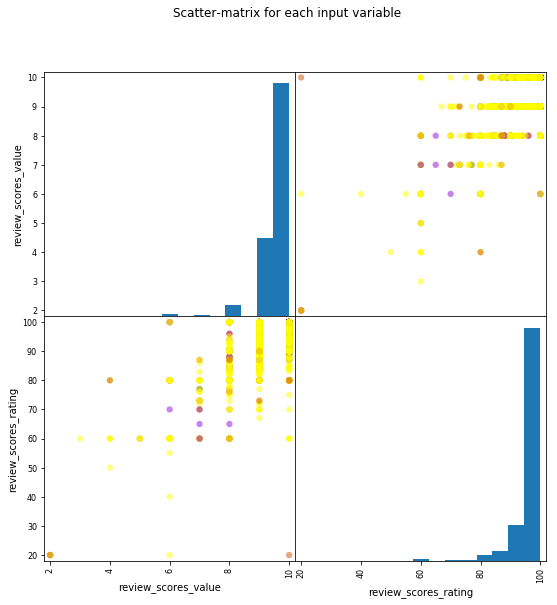

In [20]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['review_scores_value', 'review_scores_rating']
X = df_new4[feature_names]
y = df_new4['host_response_time_code']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('review_data_scatter_matrix')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print (X_test)
#print (y_train)

In [22]:
#For Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.81


In [23]:
# For Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on test set: 0.81


In [24]:
#For K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.81


In [25]:
#For Linear discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.79
Accuracy of LDA classifier on test set: 0.81


In [26]:
# For Gauissan Naives Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.78
Accuracy of GNB classifier on test set: 0.79


In [27]:
#For SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.79
Accuracy of SVM classifier on test set: 0.81


In [28]:
#Report using decision tree classifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[   0    0    0   17]
 [   0    0    0  129]
 [   1    0    0  199]
 [   1    0    1 1478]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        17
          1       0.00      0.00      0.00       129
          2       0.00      0.00      0.00       200
          3       0.81      1.00      0.89      1480

avg / total       0.66      0.81      0.73      1826



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
# The Confusion Matrix shows that the model is over predicting all features to be a Class 3.
# There is a need to rephrase the classification question and add more classification features.
df_new4.head(3)

,review_scores_value,review_scores_rating,host_response_time_code
0,10.0,98.0,3
1,9.0,93.0,2
2,9.0,91.0,2


In [30]:
#Adding new columns to the dataframe (is_business_travel_ready','price','square_feet')

In [31]:
df_new4['cleaning_fee'] = pd.Series(df['cleaning_fee'])
df_new4['price'] = pd.Series(df['price'])
df_new4['host_is_superhost'] = pd.Series(df['host_is_superhost'])
df_new4.head(12)

,review_scores_value,review_scores_rating,host_response_time_code,cleaning_fee,price,host_is_superhost
0,10.0,98.0,3,$35.00,$85.00,t
1,9.0,93.0,2,$100.00,$225.00,t
2,9.0,91.0,2,$75.00,$100.00,t
3,10.0,96.0,2,NaN,$95.00,t
4,10.0,98.0,3,NaN,$40.00,t
5,10.0,100.0,3,$50.00,$99.00,t
6,10.0,99.0,3,$0.00,$129.00,t
7,9.0,92.0,1,$85.00,$40.00,f
8,9.0,94.0,2,$0.00,$260.00,t
9,10.0,98.0,1,$50.00,$300.00,f


In [32]:
df_new4.shape

(7303, 6)

In [33]:
#Too many nulls on weekly price, square_feet,
df_new4.isnull().sum()


review_scores_value          0
review_scores_rating         0
host_response_time_code      0
cleaning_fee               656
price                        0
host_is_superhost            0
dtype: int64

In [34]:
#Unique values detection leads to replacing 'is_business_travel_ready with cleaning fee'
#print(df_new4.groupby('is_business_travel_ready').size())

In [35]:
#Unique values detection
print(df_new4.groupby('host_is_superhost').size())

host_is_superhost
f    3896
t    3407
dtype: int64


In [36]:
#dropping columns with NaN
df_new5=df_new4.dropna()
df_new5.shape

(6647, 6)

In [37]:
#doing a describe
df_new5.head(4)

,review_scores_value,review_scores_rating,host_response_time_code,cleaning_fee,price,host_is_superhost
0,10.0,98.0,3,$35.00,$85.00,t
1,9.0,93.0,2,$100.00,$225.00,t
2,9.0,91.0,2,$75.00,$100.00,t
5,10.0,100.0,3,$50.00,$99.00,t


In [38]:
df_new5.dtypes

review_scores_value        float64
review_scores_rating       float64
host_response_time_code      int64
cleaning_fee                object
price                       object
host_is_superhost           object
dtype: object

In [39]:
#df_new5['cleaning_fee'].unique

In [40]:
#df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,'')
df_new5['cleaning_fee']=df_new5.cleaning_fee.map(lambda x: locale.atof(x.strip('$')))
df_new5['price']=df_new5.price.map(lambda x: locale.atof(x.strip('$')))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
df_new5.head()

,review_scores_value,review_scores_rating,host_response_time_code,cleaning_fee,price,host_is_superhost
0,10.0,98.0,3,35.0,85.0,t
1,9.0,93.0,2,100.0,225.0,t
2,9.0,91.0,2,75.0,100.0,t
5,10.0,100.0,3,50.0,99.0,t
6,10.0,99.0,3,0.0,129.0,t


In [42]:
df_new5.dtypes

review_scores_value        float64
review_scores_rating       float64
host_response_time_code      int64
cleaning_fee               float64
price                      float64
host_is_superhost           object
dtype: object

In [43]:
df_new5['host_is_superhost'].nunique()

2

In [44]:
from sklearn.preprocessing import LabelEncoder

df_new6 =df_new5.copy()
df_new6['host_is_superhost']=lb_make.fit_transform(df_new5['host_is_superhost'])
df_new6.head(3)

#from sklearn.preprocessing import LabelEncoder

#df_new3 =df_new2.copy()
#lb_make = LabelEncoder()
#df_new3['host_response_time_code']=lb_make.fit_transform(df_new2['host_response_time'])
#df_new3.head(3)


,review_scores_value,review_scores_rating,host_response_time_code,cleaning_fee,price,host_is_superhost
0,10.0,98.0,3,35.0,85.0,1
1,9.0,93.0,2,100.0,225.0,1
2,9.0,91.0,2,75.0,100.0,1


In [45]:
df_new6.dtypes

review_scores_value        float64
review_scores_rating       float64
host_response_time_code      int64
cleaning_fee               float64
price                      float64
host_is_superhost            int64
dtype: object

In [46]:
#Processing review score values such that values are either a 10 or not
df_new6.loc[df_new6.review_scores_value < 10, 'review_scores_value'] = 0
df_new6.head(2)

,review_scores_value,review_scores_rating,host_response_time_code,cleaning_fee,price,host_is_superhost
0,10.0,98.0,3,35.0,85.0,1
1,0.0,93.0,2,100.0,225.0,1


In [47]:
feature_names1 = ['review_scores_rating', 'host_response_time_code','cleaning_fee','price','host_is_superhost']
X = df_new6[feature_names1]
y = df_new6['review_scores_value']

In [48]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print (X_test)
#print (y_train)

In [49]:
#For Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78


In [50]:
# For Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.73


In [51]:
#For K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.79


In [52]:
#For Linear discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.78
Accuracy of LDA classifier on test set: 0.78


In [53]:
# For Gauissan Naives Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.78
Accuracy of GNB classifier on test set: 0.77


In [54]:
#For SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.77


In [55]:
#Report using decision tree classifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[267 228]
 [222 945]]
             precision    recall  f1-score   support

        0.0       0.55      0.54      0.54       495
       10.0       0.81      0.81      0.81      1167

avg / total       0.73      0.73      0.73      1662



In [ ]:
#Hyperparameter tuning of the two top models clf (decision tree) and knn (K nearest neighbor)

In [62]:
# Train the classifier using training data 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
# Make predictions using test set 
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#y_pred = dt.predict(X_test)
# Check the AUC of predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label='good')
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

In [84]:
labels = df_new6['review_scores_value']
labels_removed_df = df_new6.drop('review_scores_value', axis=1, inplace=False)
labels_removed_df.head(2)

,review_scores_rating,host_response_time_code,cleaning_fee,price,host_is_superhost
0,98.0,3,35.0,85.0,1
1,93.0,2,100.0,225.0,1


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(labels_removed_df)

In [86]:
# Identify the optimal tree depth for given data
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [87]:
dt_grid_search = GridSearchCV(clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(scaled_df, labels)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [88]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_df, labels)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 82.75%
Mean Testing Score: 81.54%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}